## Project 3 (Pract) - Red Wine Quality Prediction

**Problem Statement:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

**Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

**You need to build a classification model. 

--Inspiration
- Use machine learning to determine which physiochemical properties make a wine 'good'!



In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [67]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

dw=pd.DataFrame(data=df)
dw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Checking Info of the dataset

In [68]:
dw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [69]:
#if has null value, fill those by imputation
dw.isnull().sum().sum()

0

#### NO NULL VALUES, so let's proceed ahead.

In [70]:
type(dw)

pandas.core.frame.DataFrame

In [71]:
dw.shape #gives nos of rows and columns

(1599, 12)

##### The dataset had 12 columns and 1599 rows, out of which column nos 0-10 are independant and 11th columm (quality of wine) is dependant.

In [72]:
dw.columns #name of columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [73]:
dw["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

#### In this dataset,various factors are mentioned on which the quality of wine is dependant. 
- The wine quality is categorized in 6 types from 3-8, we may call it as score given to wine.
- Score 3 is the okay quality wine, while 8 being the highest quality wine

### Labelling the score of wine quality as good =1 and bad =0

In [74]:
dw['quality'] = np.where((dw['quality'] <=7),0,1)
dw['quality'].unique()

array([0, 1])

In [75]:
dw['quality'].value_counts()

0    1581
1      18
Name: quality, dtype: int64

#### There is imbalance in the data, so let us balance it at a later step.

## Visualization of the data

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

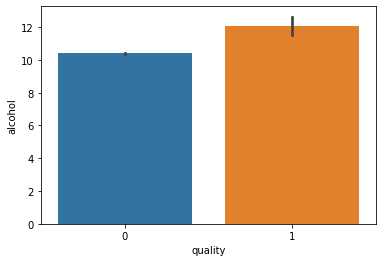

In [76]:
#using Seaborn, we plot different graphs to see corelation.

sns.barplot(data=dw,y='alcohol',x='quality')

<AxesSubplot:xlabel='quality', ylabel='pH'>

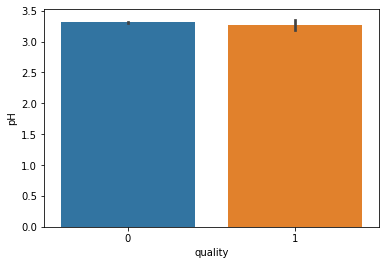

In [77]:
sns.barplot(data=dw,y='pH',x='quality')

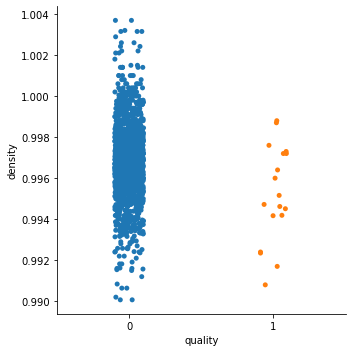

In [78]:
sns.catplot(x='quality',y='density', data = dw)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

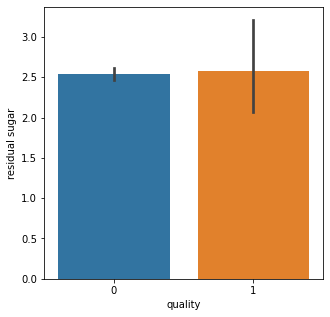

In [79]:
plt.figure(figsize = (5,5))
sns.barplot(y='residual sugar',x='quality', data = dw)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

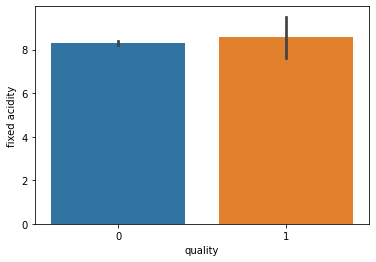

In [80]:
sns.barplot(x='quality',y='fixed acidity', data = dw)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

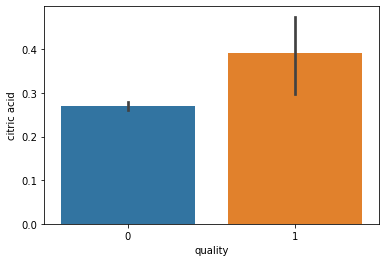

In [81]:
sns.barplot(x='quality',y='citric acid', data = dw)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

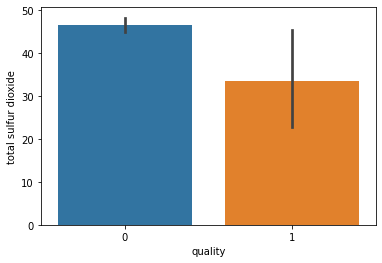

In [82]:
sns.barplot(data=dw,y='total sulfur dioxide',x='quality')

<AxesSubplot:xlabel='quality', ylabel='count'>

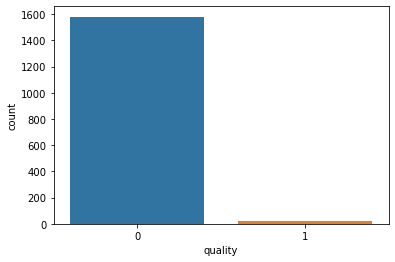

In [83]:
sns.countplot(dw['quality'])

## EXPLATORY DATA ANALYSIS(EDA)

In [84]:
dw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.011257
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.105533
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


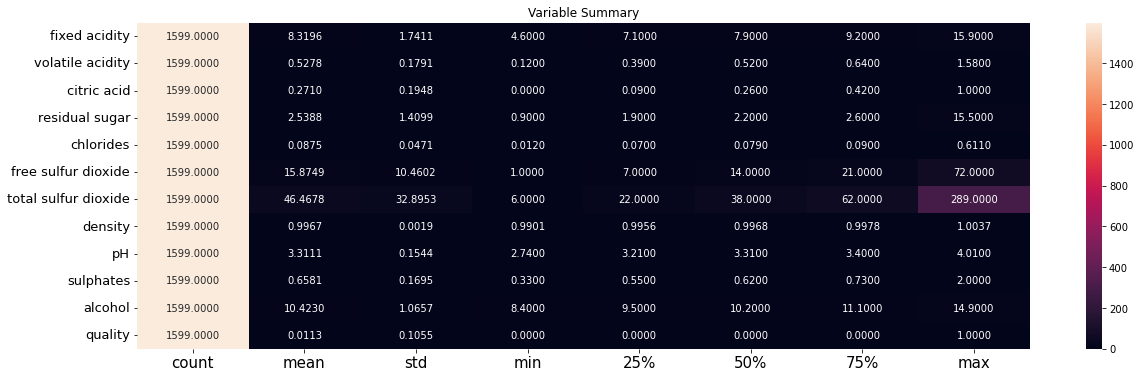

In [85]:
#plotting heat map for better understanding:
plt.figure(figsize=(20,6))
sns.heatmap(dw.describe().transpose(), annot=True,fmt='0.4f')
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.title("Variable Summary")
plt.show()

### Describing the dataset:
- The mean > Median in 'total sulphur dioxide', 'free sulphur dioxide' and 'fixed acidity', which means data is right skewed. 
- Std deviation is high in 'total sulphur dioxide', 'free sulphur dioxide, and 'fixed acidity', which means data is highly spread.
- High gap is present between 75% and max of 'alcohol','total sulphur dioxide', 'free sulphur dioxide', 'residual sugar', 'volatile acidity', and 'fixed acidity'. It means outliers might be present.

## Check Correlation of columns with the target:

In [86]:
dw.corr() #correlation 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.015144
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.062283
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.065824
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.002950
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.043138
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.026501
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.042257
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.086778
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.030344
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.069031


<AxesSubplot:>

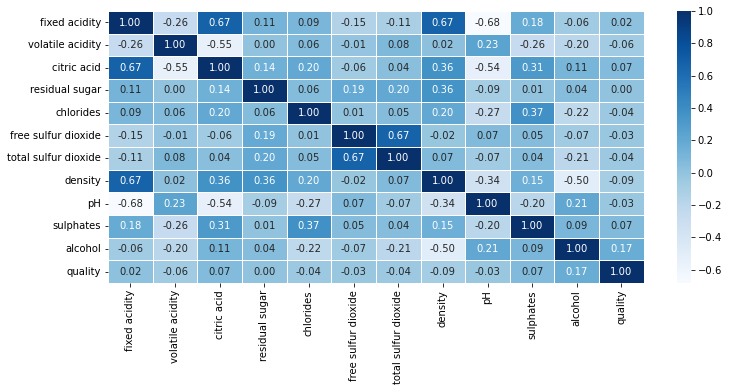

In [87]:
plt.figure(figsize=(12,5))
sns.heatmap(dw.corr(),cmap='Blues',annot=True,linewidth=0.5,fmt='0.2f')

In [88]:
dw.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.167410
sulphates               0.069031
citric acid             0.065824
fixed acidity           0.015144
residual sugar          0.002950
free sulfur dioxide    -0.026501
pH                     -0.030344
total sulfur dioxide   -0.042257
chlorides              -0.043138
volatile acidity       -0.062283
density                -0.086778
Name: quality, dtype: float64

In above graph, the "volatile acidity","density", 'chlorides' and 'total sulphur dioxide' columns are showing the maximum negative corelation with the target 'quality'
Hence, we can consider dropping those  2 columns.

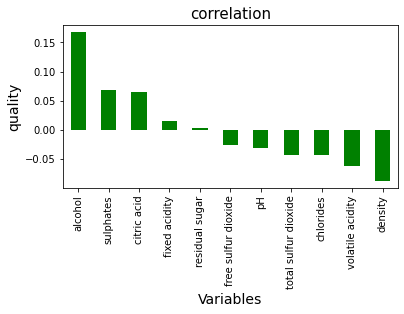

In [89]:
#checking the columns which are positively and negatively corelated with the target column:

plt.figure(figsize=(6,3))
dw.corr()["quality"].sort_values(ascending=False).drop(["quality"]).plot(kind='bar', color='g')
plt.xlabel('Variables',fontsize=14)
plt.ylabel("quality",fontsize=14)
plt.title("correlation",fontsize=15)
plt.show()

In [90]:
#we can drop the "volatile acidity", "density" from the columns as they show most negative corelation with teh target variable.
dw1=dw.drop(['volatile acidity','density'],axis=1)
dw1

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
1,7.8,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,0
2,7.8,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,0
3,11.2,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,0
4,7.4,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5,0
1595,5.9,0.10,2.2,0.062,39.0,51.0,3.52,0.76,11.2,0
1596,6.3,0.13,2.3,0.076,29.0,40.0,3.42,0.75,11.0,0
1597,5.9,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2,0


## Check Skewness
Threshold=+/-0.5

In [91]:
x=dw1.drop('quality',axis=1)
y=dw1['quality']

In [92]:
dw1.skew().sort_values(ascending=False)

quality                 9.273945
chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
citric acid             0.318337
pH                      0.193683
dtype: float64

In [93]:
#Removing Skewness
from sklearn.preprocessing import power_transform
x1=power_transform(x)
x1

array([[-0.44266589, -1.53110932, -0.59714508, ...,  1.27568965,
        -0.58164981, -1.07502541],
       [-0.16130769, -1.53110932,  0.5565652 , ..., -0.70951743,
         0.39513995, -0.50085961],
       [-0.16130769, -1.25535866,  0.15237248, ..., -0.31005407,
         0.18377155, -0.50085961],
       ...,
       [-1.36436736, -0.68329383,  0.15237248, ...,  0.71886862,
         0.82084149,  0.73455753],
       [-1.76745837, -0.74382636, -0.38099806, ...,  1.63859528,
         0.58834382, -0.01879986],
       [-1.66263981,  1.03107021,  1.37543465, ...,  0.52983162,
         0.25636927,  0.73455753]])

In [94]:
#check skewness removed?
pd.DataFrame(x1).skew().sort_values(ascending=False)

8    0.112372
1    0.017788
7    0.009985
0    0.002529
6   -0.002823
5   -0.003752
4   -0.009948
2   -0.015715
3   -0.151304
dtype: float64

In [95]:
type(x1)

numpy.ndarray

In [96]:
x=pd.DataFrame(x1, columns=x.columns)
x

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,-0.442666,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,1.275690,-0.581650,-1.075025
1,-0.161308,-1.531109,0.556565,0.786204,0.993852,0.854954,-0.709517,0.395140,-0.500860
2,-0.161308,-1.255359,0.152372,0.560696,0.193450,0.540394,-0.310054,0.183772,-0.500860
3,1.522582,1.398471,-0.597145,-0.226113,0.385115,0.693699,-0.980154,-0.392318,-0.500860
4,-0.442666,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,1.275690,-0.581650,-1.075025
...,...,...,...,...,...,...,...,...,...
1594,-1.461202,-0.993315,-0.380998,0.480036,1.397043,0.244351,0.906172,-0.392318,0.292864
1595,-1.767458,-0.867068,-0.008632,-1.013159,1.727353,0.457504,1.336627,0.874884,0.888124
1596,-1.364367,-0.683294,0.152372,-0.172896,1.235044,0.107498,0.718869,0.820841,0.734558
1597,-1.767458,-0.743826,-0.380998,-0.226113,1.397043,0.244351,1.638595,0.588344,-0.018800


In [97]:
x.skew().sort_values(ascending=False)

alcohol                 0.112372
citric acid             0.017788
sulphates               0.009985
fixed acidity           0.002529
pH                     -0.002823
total sulfur dioxide   -0.003752
free sulfur dioxide    -0.009948
residual sugar         -0.015715
chlorides              -0.151304
dtype: float64

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

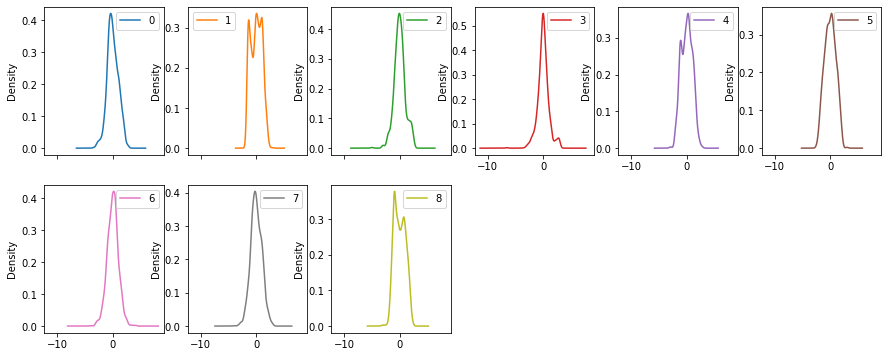

In [98]:
pd.DataFrame(x1).plot(kind='kde',subplots=True,layout=(2,6),figsize=(15,6))

### Skewness is removed

## Checking Outliers:

fixed acidity              AxesSubplot(0.125,0.657941;0.133621x0.222059)
citric acid             AxesSubplot(0.285345,0.657941;0.133621x0.222059)
residual sugar           AxesSubplot(0.44569,0.657941;0.133621x0.222059)
chlorides               AxesSubplot(0.606034,0.657941;0.133621x0.222059)
free sulfur dioxide     AxesSubplot(0.766379,0.657941;0.133621x0.222059)
total sulfur dioxide       AxesSubplot(0.125,0.391471;0.133621x0.222059)
pH                      AxesSubplot(0.285345,0.391471;0.133621x0.222059)
sulphates                AxesSubplot(0.44569,0.391471;0.133621x0.222059)
alcohol                 AxesSubplot(0.606034,0.391471;0.133621x0.222059)
quality                 AxesSubplot(0.766379,0.391471;0.133621x0.222059)
dtype: object

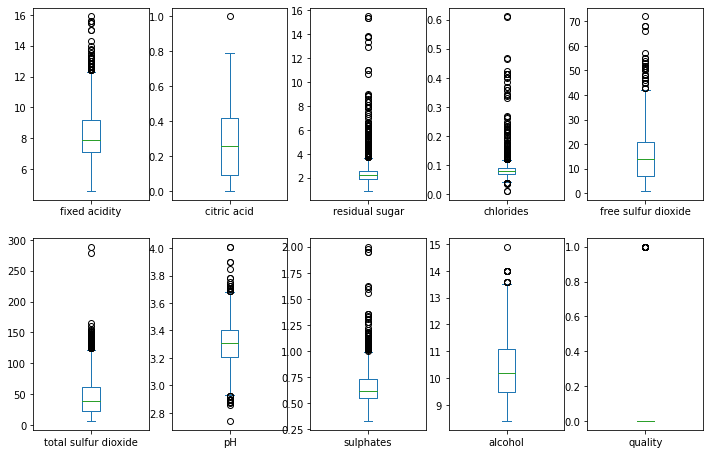

In [99]:
dw1.plot(kind='box',subplots=True,layout=(3,5),figsize=(12,12))

Here outliers may be present in all columns mostly. so we need to remove those.

### Removing Outliers

In [100]:
from scipy.stats import zscore
z=np.abs(zscore(dw1))
z.head()


,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.528360,1.391472,0.453218,0.243707,0.466193,0.379133,1.288643,0.579207,0.960246,0.106701
1,0.298547,1.391472,0.043416,0.223875,0.872638,0.624363,0.719933,0.128950,0.584777,0.106701
2,0.298547,1.186070,0.169427,0.096353,0.083669,0.229047,0.331177,0.048089,0.584777,0.106701
3,1.654856,1.484154,0.453218,0.264960,0.107592,0.411500,0.979104,0.461180,0.584777,0.106701
4,0.528360,1.391472,0.453218,0.243707,0.466193,0.379133,1.288643,0.579207,0.960246,0.106701


In [101]:
#threshold for zscore values-----> above 3 are considered as outliers.

threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   42,   43,   45,
         57,   81,   81,   83,   86,   88,   91,   92,   95,  106,  106,
        109,  142,  144,  147,  151,  151,  151,  151,  163,  164,  169,
        169,  181,  226,  226,  240,  243,  244,  258,  258,  267,  274,
        278,  281,  291,  324,  325,  339,  340,  347,  354,  374,  381,
        390,  391,  396,  396,  400,  400,  440,  442,  451,  455,  467,
        480,  481,  494,  495,  498,  515,  544,  554,  555,  557,  568,
        584,  588,  588,  591,  595,  614,  636,  639,  649,  649,  651,
        652,  652,  652,  672,  684,  692,  692,  695,  723,  730,  754,
        776,  777,  795,  821,  828,  911,  917,  923,  925,  926,  982,
       1043, 1051, 1051, 1061, 1071, 1074, 1079, 1079, 1081, 1081, 1090,
       1111, 1120, 1131, 1154, 1165, 1175, 1186, 1202, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1288, 1289, 1295, 1296, 1300,
       1316, 1319, 1319, 1321, 1358, 1367, 1370, 1

In [102]:
z.iloc[13,7], z.iloc[1589][2]

(5.32210116796055, 3.732701384742145)

In [103]:
df1=dw1[(z<3).all(axis=1)]
df1

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
1,7.8,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,0
2,7.8,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,0
3,11.2,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,0
4,7.4,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5,0
1595,5.9,0.10,2.2,0.062,39.0,51.0,3.52,0.76,11.2,0
1596,6.3,0.13,2.3,0.076,29.0,40.0,3.42,0.75,11.0,0
1597,5.9,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2,0


In [104]:
print('Old_DF:',dw.shape)
print('New_DF:',df1.shape)
print('total dropped rows:',dw.shape[0]-df1.shape[0])

Old_DF: (1599, 12)
New_DF: (1458, 10)
total dropped rows: 141


The original dataset had 12 columns and 1599 rows, while after removing the outliers the dataset is having 1458 rows and  10 colums

### Percentage data loss
Checking how many outliers are still there and if they help in the testing model or not.

In [105]:
loss_percent=(1599-1458)/1599*100
print(loss_percent,'%')

8.818011257035648 %


### Using SMOTE to balance the target column:

In [106]:
#from imblearn.over_sampling import SMOTE

smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)
trainx.value_counts()

fixed acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  pH         sulphates  alcohol  
 1.332779       1.279194     0.556565       -0.507092  -1.342264            -1.171799             -1.048366   0.183772   0.734558    35
-0.370000      -1.391443    -1.104785        0.220089  -0.021924            -0.255368              0.339033  -0.783598   0.292864     4
-0.592974      -0.683294    -0.380998       -0.172896  -0.140581            -0.867181             -0.113174  -0.783598  -0.131698     4
-1.000662      -0.061057    -1.104785       -0.120630   0.473632            -0.124411              0.529832  -0.214668   0.388468     4
-0.592974       0.988411    -0.185690       -0.280297   0.928171             0.244351              0.593038   1.298474   0.734558     4
                                                                                                                                     ..
-0.331911       0.405070    -0.509313       -1.214309 

In [42]:
trainy.value_counts()

0    1581
1    1581
Name: quality, dtype: int64

In [43]:
y=trainy

<AxesSubplot:xlabel='quality', ylabel='count'>

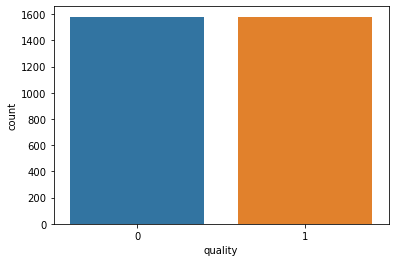

In [44]:
sns.countplot(y)

#### Target column data is balanced

## Scaling The Data using Standard Scaler
#### Since the data is in binary we will use the logistic regression model

In [45]:
from sklearn.preprocessing import StandardScaler #import logistic regression,from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
sc=StandardScaler()
lg=LogisticRegression()
x=sc.fit_transform(trainx)
x

array([[-0.47321501, -1.92244094, -0.65898695, ...,  1.4580537 ,
        -1.12727493, -1.66687672],
       [-0.20543166, -1.92244094,  0.54639486, ..., -0.55032022,
         0.01855954, -1.11880706],
       [-0.20543166, -1.63445676,  0.12409946, ..., -0.14619523,
        -0.22938859, -1.11880706],
       ...,
       [-0.42989553,  0.15242337, -1.13037742, ..., -0.17997491,
         1.57548929, -0.58207307],
       [-0.61627123,  0.07198854, -1.05497726, ..., -0.34728536,
         1.72404353, -0.67360351],
       [-1.37000201, -0.83773512, -0.66559898, ...,  0.50298141,
         0.74951554,  0.84720053]])

# Training of the data

### Finding the best random fit

In [46]:
MaxAcu=0 #Max Accuracy
MaxRS=0 #best random state for which best accuracy is acheived

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,train_size=0.30,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    
    print(f"At random state {i} the Maximum accuracy score is: {accuracy_score(y_test,pred)}")
    print("\n")
    if acc>MaxAcu:
        MaxAcu=acc
        MaxRS=i    

At random state 1 the Maximum accuracy score is: 0.9218608852755195


At random state 2 the Maximum accuracy score is: 0.926829268292683


At random state 3 the Maximum accuracy score is: 0.9290876242095755


At random state 4 the Maximum accuracy score is: 0.9272809394760614


At random state 5 the Maximum accuracy score is: 0.9254742547425474


At random state 6 the Maximum accuracy score is: 0.9272809394760614


At random state 7 the Maximum accuracy score is: 0.9245709123757905


At random state 8 the Maximum accuracy score is: 0.9236675700090334


At random state 9 the Maximum accuracy score is: 0.9214092140921409


At random state 10 the Maximum accuracy score is: 0.9069557362240289


At random state 11 the Maximum accuracy score is: 0.919602529358627


At random state 12 the Maximum accuracy score is: 0.9308943089430894


At random state 13 the Maximum accuracy score is: 0.90063233965673


At random state 14 the Maximum accuracy score is: 0.924119241192412


At random state 15 t

#### At random state 33 the Maximum accuracy score is: 0.9349593495934959

Moving on with the train test split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=33)
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((2213, 9), (949, 9), (2213,), (949,))

### Logistic regression

In [48]:
LR=LogisticRegression()
LR.fit(x_train,y_train) #training the model
predlr=LR.predict(x_test) #predicted target variable
print("Accuracy Score is:",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
print('\n') 

Accuracy Score is: 93.04531085353003
[[401  61]
 [  5 482]]
              precision    recall  f1-score   support

           0       0.99      0.87      0.92       462
           1       0.89      0.99      0.94       487

    accuracy                           0.93       949
   macro avg       0.94      0.93      0.93       949
weighted avg       0.94      0.93      0.93       949





### Random Forest Classifier

In [49]:
#from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier() 
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

99.57850368809274
[[458   4]
 [  0 487]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       462
           1       0.99      1.00      1.00       487

    accuracy                           1.00       949
   macro avg       1.00      1.00      1.00       949
weighted avg       1.00      1.00      1.00       949



### K Neighbour Classifier

In [50]:
kn=KNeighborsClassifier(n_neighbors=5) #nos of neighbors by default =5
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
predkn=kn.predict(x_test)
print(accuracy_score (y_test, predkn)*100)
print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

95.36354056902002
[[418  44]
 [  0 487]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       462
           1       0.92      1.00      0.96       487

    accuracy                           0.95       949
   macro avg       0.96      0.95      0.95       949
weighted avg       0.96      0.95      0.95       949



### Support vector Classifier

In [51]:
svc=SVC(kernel='rbf')

svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score (y_test, predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

97.47102212855637
[[438  24]
 [  0 487]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       462
           1       0.95      1.00      0.98       487

    accuracy                           0.97       949
   macro avg       0.98      0.97      0.97       949
weighted avg       0.98      0.97      0.97       949



### Decision Tree Classifier

In [52]:
dtc=DecisionTreeClassifier() 
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

97.26027397260275
[[449  13]
 [ 13 474]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       462
           1       0.97      0.97      0.97       487

    accuracy                           0.97       949
   macro avg       0.97      0.97      0.97       949
weighted avg       0.97      0.97      0.97       949



#### Here Random Forest Clasifier gives the best accuracy score of 99%

## Cross Validation Method

In [53]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validadtion score of Logistic regression Model is", scr.mean())

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validadtion score of Random Forest Classifier is", scr.mean())

scr=cross_val_score(kn,x,y,cv=5)
print("Cross validadtion score of KNeighborClassifier is", scr.mean())

scr=cross_val_score(svc,x,y,cv=5)
print("Cross validadtion score of SVC is", scr.mean())

scr=cross_val_score(dtc,x,y,cv=5)
print("Cross validadtion score of DecisionTreeClassifier is", scr.mean())

Cross validadtion score of Logistic regression Model is 0.9183899254104425
Cross validadtion score of Random Forest Classifier is 0.9822894794728738
Cross validadtion score of KNeighborClassifier is 0.9440183374327594
Cross validadtion score of SVC is 0.9712130301757753
Cross validadtion score of DecisionTreeClassifier is 0.9674250604915313


#### Here also, the best cross validation score is from the Random Forest Classifier which is 98% which is nearby to the accuracy score of 99%

## Hyper parameter tuning of best model above

In [54]:
from sklearn.model_selection import GridSearchCV

#creating parameters to pass in Grid serach
para={'max_features':["auto","sqrt","log2"],'max_depth':[4,5,6,7,8],'criterion':["gini","entropy"]}

In [55]:
GCV=GridSearchCV(RandomForestClassifier(),para,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train) #fiting the data in the model
GCV.best_params_ #printing the best parameter found by GCV

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2'}

In [56]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2')

In [57]:
GCV_pred=GCV.best_estimator_.predict(x_test)  #predicting with best parameters
accuracy_score(y_test,GCV_pred) #checking best acuracy score

0.9863013698630136

##### The Grid Search CV gives the RandomForest Classifier as the best algorithm for the model training with following best parameters :
    - criterion='entropy', max_depth=8
    - and an accuracy score of 98%
    - max_features=log2

##  AUC-ROC curves:

In [58]:
from sklearn.metrics import roc_auc_score

In [59]:
#Logistic Regression
print("Logistic Regression:" ,roc_auc_score(y_test,predlr))
#Random Forest Classifier
print("Random Forest Classifier:",roc_auc_score(y_test,predrf))
#KNeighbour Classifier
print("KNeighbour Classifier:",roc_auc_score(y_test,predkn))
#SV Classifier
print("SV Classifier:",roc_auc_score(y_test,predsvc))
# Decision Tree Classifier
print("Decision Tree Classifier:",roc_auc_score(y_test,preddtc))

Logistic Regression: 0.9288492137568112
Random Forest Classifier: 0.9956709956709956
KNeighbour Classifier: 0.9523809523809523
SV Classifier: 0.974025974025974
Decision Tree Classifier: 0.972583713343467


#### Random Forest Classifier shows the best AUC/ROC score of 99%

ROC AUC curve:

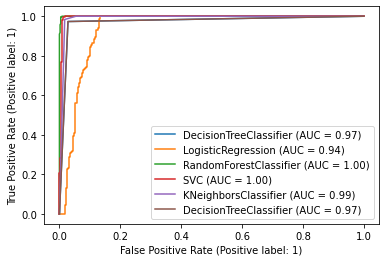

In [60]:
from sklearn.metrics import plot_roc_curve

graph = plot_roc_curve(dtc,x_test,y_test)
model= [lg,rf,svc,kn,dtc]

for i in model:
    plot_roc_curve(i,x_test,y_test, ax=graph.ax_)
plt.legend(prop = {'size':10}, loc = 'lower right')
plt.show()

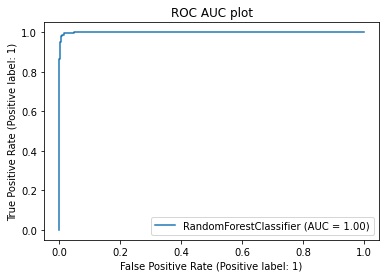

In [61]:
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

## Saving the model

In [62]:
import joblib

joblib.dump(rf,'RedWine.obj') ##save the model as an object file
RedWine_from_joblib=joblib.load('RedWine.obj') #load the model from the file

#use the loaded model to make predictions
RedWine_from_joblib.predict(x_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,

# END